Problem Statement - Aerofit wants to increase the sales of their tredmill. They have 3 types of tredmills - 1. KP281, 2. KP481, 3. 'KP781'.

They want to do the customer profiling in order to determine who likely is going to by which type of tredmill based on Age, Gender, Education, Marital Status, Usage per week,	current Fitness rating, Annual Income &	Miles per week.

So goal is to provide business Insights & Recommendations based on Non-Graphical and Visual Analysis.

Content :
1. Exploratory data analysis

In [1]:
from scipy.stats import norm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv

--2023-06-24 19:12:47--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.172.183, 108.157.172.176, 108.157.172.173, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.172.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7279 (7.1K) [text/plain]
Saving to: ‘aerofit_treadmill.csv’

aerofit_treadmill.c 100%[===================>]   7.11K  --.-KB/s    in 0s      

2023-06-24 19:12:48 (1.04 GB/s) - ‘aerofit_treadmill.csv’ saved [7279/7279]



In [3]:
df = pd.read_csv("aerofit_treadmill.csv")
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


1. Exploratory data analysis

In [4]:
df.shape

(180, 9)

In [5]:
df.info()   # No missing values,  Data type is correct for all the columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [6]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [7]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [8]:
df["Product"].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [9]:
df["Product"].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

Insights -
1. *Age - 50% of the total buyers are below 26 age.*
2. *Minimum income of the buyer - 29562.00*
3. *Minimum Education of the buyer - 12 years*



## 2. Subsets - These will be referred later during analysis

In [10]:
KP281 = df.loc[df["Product"] == "KP281"]
KP281.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [11]:
KP481 = df.loc[df["Product"] == "KP481"]
KP481.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
80,KP481,19,Male,14,Single,3,3,31836,64
81,KP481,20,Male,14,Single,2,3,32973,53
82,KP481,20,Female,14,Partnered,3,3,34110,106
83,KP481,20,Male,14,Single,3,3,38658,95
84,KP481,21,Female,14,Partnered,5,4,34110,212


In [12]:
KP781 = df.loc[df["Product"] == "KP781"]
KP781.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
140,KP781,22,Male,14,Single,4,3,48658,106
141,KP781,22,Male,16,Single,3,5,54781,120
142,KP781,22,Male,18,Single,4,5,48556,200
143,KP781,23,Male,16,Single,4,5,58516,140
144,KP781,23,Female,18,Single,5,4,53536,100


In [13]:
Female = df.loc[df["Gender"] == "Female"]
Female.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
2,KP281,19,Female,14,Partnered,4,3,30699,66
5,KP281,20,Female,14,Partnered,3,3,32973,66
6,KP281,21,Female,14,Partnered,3,3,35247,75
9,KP281,21,Female,15,Partnered,2,3,37521,85
11,KP281,22,Female,14,Partnered,3,2,35247,66


In [14]:
Male = df.loc[df["Gender"] == "Male"]
Male.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
7,KP281,21,Male,13,Single,3,3,32973,85


# 3. Non-Graphical Analysis: Value counts and unique attributes

**Overall Sales distribution of all three tredmills**

In [15]:
round(df["Product"].value_counts()/ len(df)*100,2)    #productwise sales distribution

KP281    44.44
KP481    33.33
KP781    22.22
Name: Product, dtype: float64

In [16]:
pd.crosstab(index = df["Gender"], columns = df["Product"], margins = True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


In [17]:
round(df["Gender"].value_counts()/ len(df)*100,2)    #genderwise sales distribution

Male      57.78
Female    42.22
Name: Gender, dtype: float64

In [18]:
round(pd.crosstab(index = df["Gender"], columns = df["Product"], margins = True, normalize = "columns")*100,2)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,50.0,48.33,17.5,42.22
Male,50.0,51.67,82.5,57.78


In [19]:
round(df["Education"].value_counts()/ len(df)*100,2)    #educationwise sales distribution

16    47.22
14    30.56
18    12.78
15     2.78
13     2.78
12     1.67
21     1.67
20     0.56
Name: Education, dtype: float64

In [20]:
round(pd.crosstab(index = df["Education"], columns = df["Product"], margins = True, normalize = "columns")*100,2)

Product,KP281,KP481,KP781,All
Education,,,,
12,2.50,1.67,0.0,1.67
13,3.75,3.33,0.0,2.78
14,37.50,38.33,5.0,30.56
15,5.00,1.67,0.0,2.78
16,48.75,51.67,37.5,47.22
18,2.50,3.33,47.5,12.78
20,0.00,0.00,2.5,0.56
21,0.00,0.00,7.5,1.67


In [21]:
round(df["Usage"].value_counts()/ len(df)*100,2)    #usagewise sales distribution

3    38.33
4    28.89
2    18.33
5     9.44
6     3.89
7     1.11
Name: Usage, dtype: float64

In [22]:
round(pd.crosstab(index = df["Usage"], columns = df["Product"], margins = True, normalize = "columns")*100,2)

Product,KP281,KP481,KP781,All
Usage,,,,
2,23.75,23.33,0.0,18.33
3,46.25,51.67,2.5,38.33
4,27.50,20.00,45.0,28.89
5,2.50,5.00,30.0,9.44
6,0.00,0.00,17.5,3.89
7,0.00,0.00,5.0,1.11


In [23]:
round(df["Fitness"].value_counts()/ len(df)*100,2)    #fitnesswise sales distribution

3    53.89
5    17.22
2    14.44
4    13.33
1     1.11
Name: Fitness, dtype: float64

In [24]:
round(pd.crosstab(index = df["Fitness"], columns = df["Product"], margins = True, normalize = "columns")*100,2)

Product,KP281,KP481,KP781,All
Fitness,,,,
1,1.25,1.67,0.0,1.11
2,17.50,20.00,0.0,14.44
3,67.50,65.00,10.0,53.89
4,11.25,13.33,17.5,13.33
5,2.50,0.00,72.5,17.22


In [25]:
round(df["Education"].value_counts()/ len(df)*100,2)    #educationwise sales distribution

16    47.22
14    30.56
18    12.78
15     2.78
13     2.78
12     1.67
21     1.67
20     0.56
Name: Education, dtype: float64

In [42]:
round(pd.crosstab(index = df["Education"], columns = df["Product"], margins = True, normalize = "columns")*100,2)

Product,KP281,KP481,KP781,All
Education,,,,
12,2.50,1.67,0.0,1.67
13,3.75,3.33,0.0,2.78
14,37.50,38.33,5.0,30.56
15,5.00,1.67,0.0,2.78
16,48.75,51.67,37.5,47.22
18,2.50,3.33,47.5,12.78
20,0.00,0.00,2.5,0.56
21,0.00,0.00,7.5,1.67


In [75]:
pd.crosstab(index = [df["Gender"], df["MaritalStatus"]], columns = df["Product"], margins = True )

Product               KP281  KP481  KP781  All
Gender MaritalStatus                          
Female Partnered         27     15      4   46
       Single            13     14      3   30
Male   Partnered         21     21     19   61
       Single            19     10     14   43
All                      80     60     40  180

In [76]:
pd.crosstab(index = df["MaritalStatus"], columns = df["Product"], margins = True)

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,48,36,23,107
Single,32,24,17,73
All,80,60,40,180


In [74]:
round(pd.crosstab(index = df["MaritalStatus"], columns = df["Product"], margins = True, normalize = "columns")*100,2)

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,60.0,60.0,57.5,59.44
Single,40.0,40.0,42.5,40.56


### **pending Age, MaritalStatus, Income, Miles - visual analysis**

<Axes: xlabel='Income', ylabel='Count'>

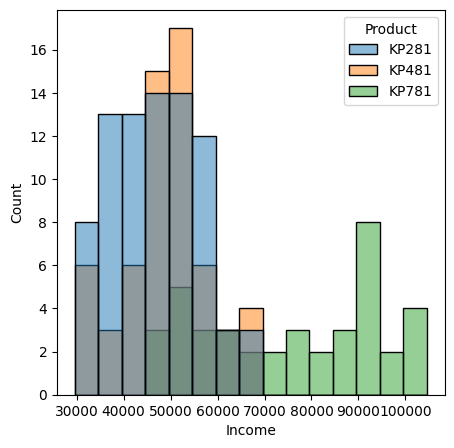

In [62]:
plt.figure(figsize=(5,5))
sns.histplot(data=df, x = "Income", hue = "Product")

<Axes: xlabel='Product', ylabel='Age'>

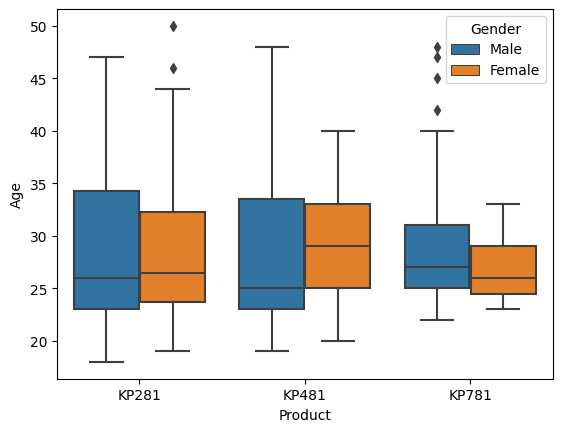

In [54]:
sns.boxplot(df, y = "Age", x = "Product", hue = "Gender")

<Axes: xlabel='Product', ylabel='Education'>

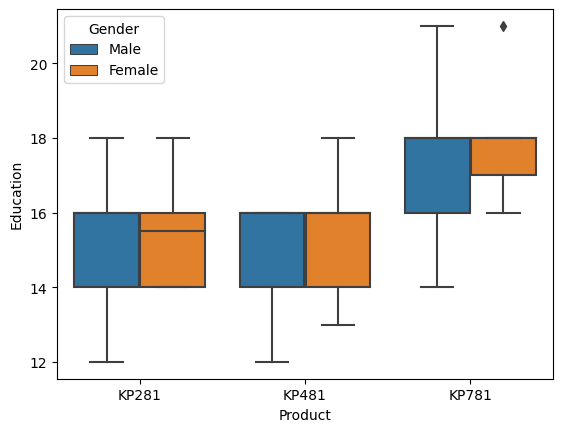

In [55]:
sns.boxplot(df, y = "Education", x = "Product", hue = "Gender")

<Axes: xlabel='Product', ylabel='Income'>

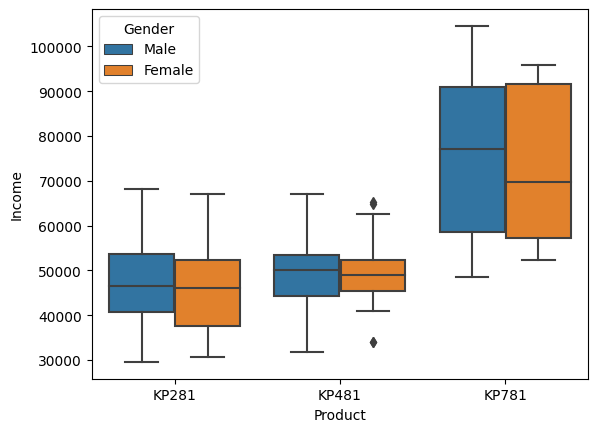

In [56]:
sns.boxplot(df, y = "Income", x = "Product", hue = "Gender")

<Figure size 800x800 with 0 Axes>

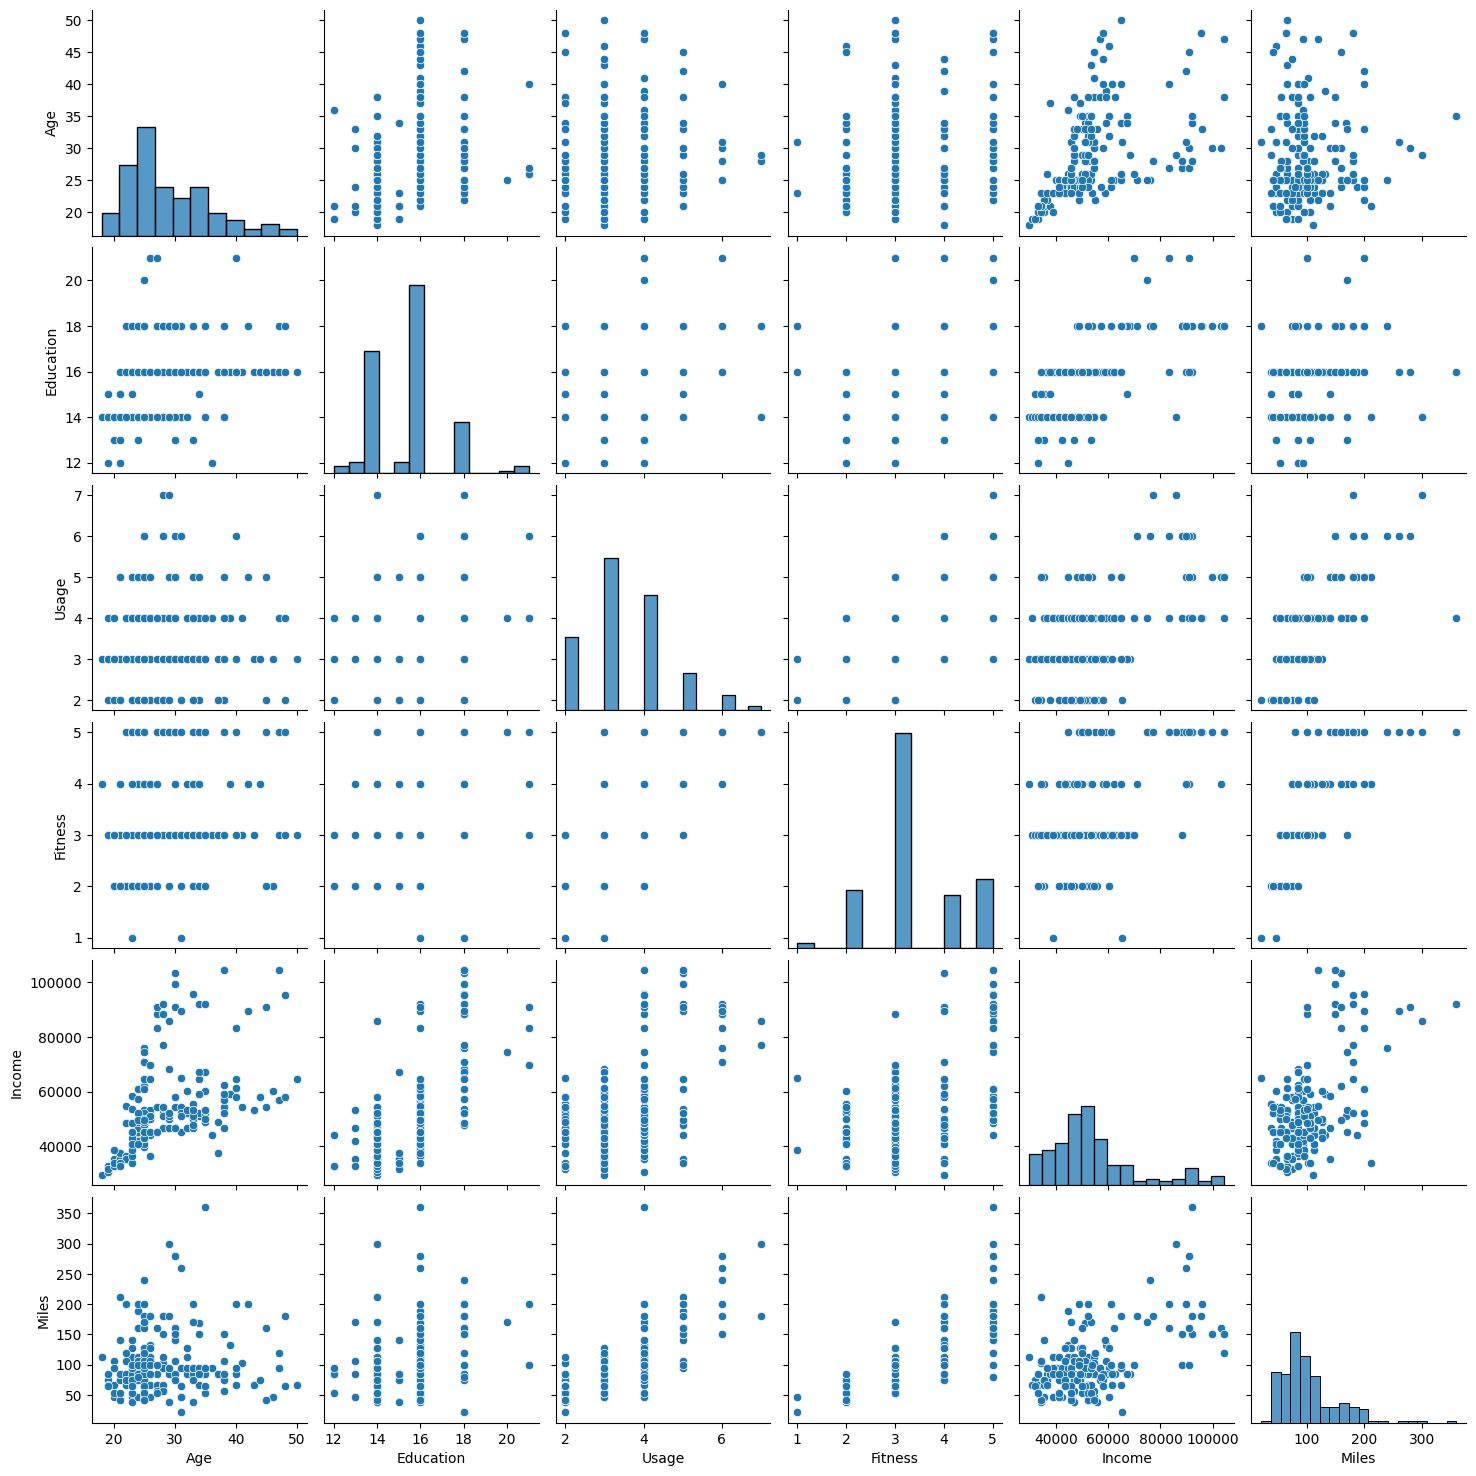

In [30]:
plt.figure(figsize=(8,8))
sns.pairplot(data=df)

In [31]:
df.corr()

<ipython-input-31-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<ipython-input-37-e37c88af20d3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(KP281.corr(),annot=True, cmap="flare")


<Axes: >

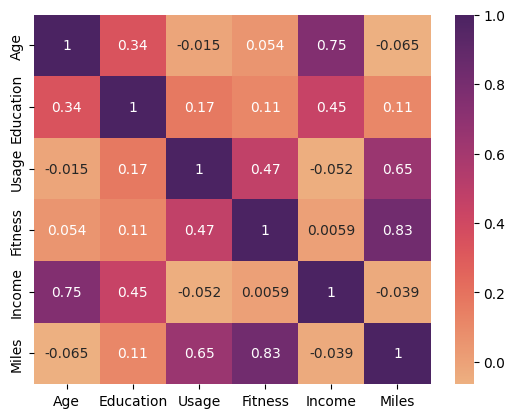

In [37]:
sns.heatmap(KP281.corr(),annot=True, cmap="flare")

<ipython-input-39-72140a718126>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(KP481.corr(),annot=True, cmap="flare")


<Axes: >

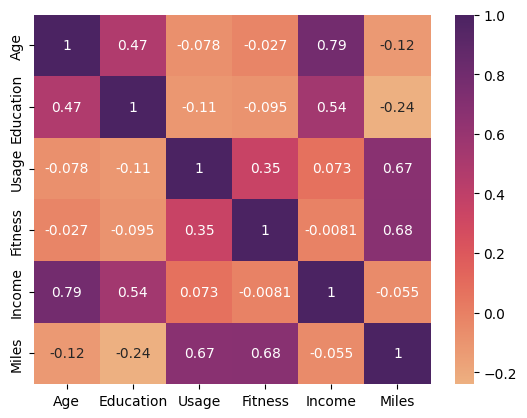

In [39]:
sns.heatmap(KP481.corr(),annot=True, cmap="flare")

<ipython-input-38-17f82956a276>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(KP781.corr(),annot=True, cmap="flare")


<Axes: >

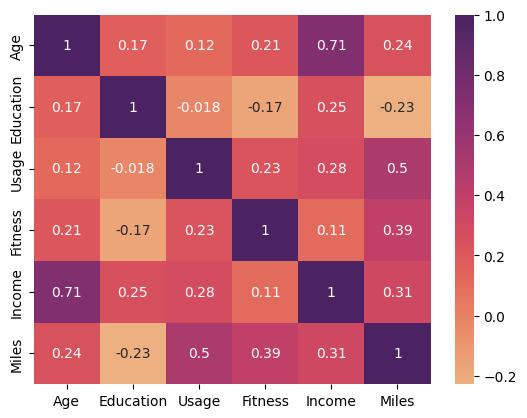

In [38]:
sns.heatmap(KP781.corr(),annot=True, cmap="flare")

In [80]:
KP281.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,80.000000,80.000000,80.000000,80.00000,80.00000,80.000000
mean,28.550000,15.037500,3.087500,2.96250,46418.02500,82.787500
std,7.221452,1.216383,0.782624,0.66454,9075.78319,28.874102
min,18.000000,12.000000,2.000000,1.00000,29562.00000,38.000000
25%,23.000000,14.000000,3.000000,3.00000,38658.00000,66.000000
50%,26.000000,16.000000,3.000000,3.00000,46617.00000,85.000000
75%,33.000000,16.000000,4.000000,3.00000,53439.00000,94.000000
max,50.000000,18.000000,5.000000,5.00000,68220.00000,188.000000


In [81]:
KP481.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000
mean,28.900000,15.116667,3.066667,2.90000,48973.650000,87.933333
std,6.645248,1.222552,0.799717,0.62977,8653.989388,33.263135
min,19.000000,12.000000,2.000000,1.00000,31836.000000,21.000000
25%,24.000000,14.000000,3.000000,3.00000,44911.500000,64.000000
50%,26.000000,16.000000,3.000000,3.00000,49459.500000,85.000000
75%,33.250000,16.000000,3.250000,3.00000,53439.000000,106.000000
max,48.000000,18.000000,5.000000,4.00000,67083.000000,212.000000


In [82]:
KP781.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000
mean,29.100000,17.325000,4.775000,4.625000,75441.57500,166.900000
std,6.971738,1.639066,0.946993,0.667467,18505.83672,60.066544
min,22.000000,14.000000,3.000000,3.000000,48556.00000,80.000000
25%,24.750000,16.000000,4.000000,4.000000,58204.75000,120.000000
50%,27.000000,18.000000,5.000000,5.000000,76568.50000,160.000000
75%,30.250000,18.000000,5.000000,5.000000,90886.00000,200.000000
max,48.000000,21.000000,7.000000,5.000000,104581.00000,360.000000


In [78]:
Female.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,28.565789,15.394737,3.184211,3.026316,49828.907895,90.013158
std,6.342104,1.442950,1.016012,0.832245,12557.690428,44.782882
min,19.000000,13.000000,2.000000,1.000000,30699.000000,21.000000
25%,24.000000,14.000000,2.000000,3.000000,42921.750000,66.000000
50%,26.500000,16.000000,3.000000,3.000000,47754.000000,85.000000
75%,33.000000,16.000000,4.000000,3.000000,53796.000000,100.000000
max,50.000000,21.000000,6.000000,5.000000,95866.000000,280.000000


In [79]:
Male.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,28.951923,15.701923,3.653846,3.519231,56562.759615,112.826923
std,7.377978,1.728571,1.095172,0.994946,18421.687779,54.702451
min,18.000000,12.000000,2.000000,1.000000,29562.000000,42.000000
25%,23.750000,14.000000,3.000000,3.000000,45480.000000,85.000000
50%,26.000000,16.000000,4.000000,3.000000,52302.000000,100.000000
75%,34.000000,16.000000,4.000000,4.000000,61611.250000,141.000000
max,48.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [83]:
pd.crosstab(index = [df["Gender"]], columns = df["Product"], values = df["Fitness"], aggfunc = "mean" )

Product,KP281,KP481,KP781
Gender,,,
Female,2.875,2.862069,4.571429
Male,3.050,2.935484,4.636364


In [87]:
pd.crosstab(index = [df["Gender"]], columns = df["Product"], values = df["Income"], aggfunc = "min" )

Product,KP281,KP481,KP781
Gender,,,
Female,30699,34110,52291
Male,29562,31836,48556


# Income Based info

In [106]:
"Female who prefers KP281 has salary range " + str(Female[Female["Product"] == "KP281"]["Income"].min()) + " - " + str(Female[Female["Product"] == "KP281"]["Income"].max()) + " with an average salary of " + str(Female[Female["Product"] == "KP281"]["Income"].mean())+"."

'Female who prefers KP281 has salary range 30699 - 67083 with an average salary of 46020.075.'

In [108]:
"Female who prefers KP481 has salary range " + str(Female[Female["Product"] == "KP481"]["Income"].min()) + " - " + str(Female[Female["Product"] == "KP481"]["Income"].max()) + " with an average salary of " + str(Female[Female["Product"] == "KP481"]["Income"].mean())+"."

'Female who prefers KP481 has salary range 34110 - 65220 with an average salary of 49336.44827586207.'

In [109]:
"Female who prefers KP781 has salary range " + str(Female[Female["Product"] == "KP781"]["Income"].min()) + " - " + str(Female[Female["Product"] == "KP781"]["Income"].max()) + " with an average salary of " + str(Female[Female["Product"] == "KP781"]["Income"].mean())+"."

'Female who prefers KP781 has salary range 52291 - 95866 with an average salary of 73633.85714285714.'

In [110]:
"Male who prefers KP281 has salary range " + str(Male[Male["Product"] == "KP281"]["Income"].min()) + " - " + str(Male[Male["Product"] == "KP281"]["Income"].max()) + " with an average salary of " + str(Male[Male["Product"] == "KP281"]["Income"].mean())+"."

'Male who prefers KP281 has salary range 29562 - 68220 with an average salary of 46815.975.'

In [111]:
"Male  who prefers KP481 has salary range " + str(Male [Male ["Product"] == "KP481"]["Income"].min()) + " - " + str(Male [Male ["Product"] == "KP481"]["Income"].max()) + " with an average salary of " + str(Male [Male ["Product"] == "KP481"]["Income"].mean())+"."

'Male  who prefers KP481 has salary range 31836 - 67083 with an average salary of 48634.25806451613.'

In [112]:
"Male who prefers KP781 has salary range " + str(Male[Male["Product"] == "KP781"]["Income"].min()) + " - " + str(Male[Male["Product"] == "KP781"]["Income"].max()) + " with an average salary of " + str(Male[Male["Product"] == "KP781"]["Income"].mean())+"."

'Male who prefers KP781 has salary range 48556 - 104581 with an average salary of 75825.0303030303.'

# Miles per week

In [116]:
"Female who prefers KP281 will expects to walk/run each week in the range " + str(Female[Female["Product"] == "KP281"]["Miles"].min()) + " - " + str(Female[Female["Product"] == "KP281"]["Miles"].max()) + " miles with an average run for " + str(Female[Female["Product"] == "KP281"]["Miles"].mean())+" miles."

'Female who prefers KP281 will expects to walk/run each week in the range 38 - 188 miles with an average run for 76.2 miles.'

In [117]:
"Female who prefers KP481 will expects to walk/run each week in the range " + str(Female[Female["Product"] == "KP481"]["Miles"].min()) + " - " + str(Female[Female["Product"] == "KP481"]["Miles"].max()) + " miles with an average run for " + str(Female[Female["Product"] == "KP481"]["Miles"].mean())+" miles."

'Female who prefers KP481 will expects to walk/run each week in the range 21 - 212 miles with an average run for 87.34482758620689 miles.'

In [118]:
"Female who prefers KP781 will expects to walk/run each week in the range " + str(Female[Female["Product"] == "KP781"]["Miles"].min()) + " - " + str(Female[Female["Product"] == "KP781"]["Miles"].max()) + " miles with an average run for " + str(Female[Female["Product"] == "KP781"]["Miles"].mean())+" miles."


'Female who prefers KP781 will expects to walk/run each week in the range 100 - 280 miles with an average run for 180.0 miles.'

In [119]:
"Male who prefers KP281 will expects to walk/run each week in the range " + str(Male[Male["Product"] == "KP281"]["Miles"].min()) + " - " + str(Male[Male["Product"] == "KP281"]["Miles"].max()) + " miles with an average run for " + str(Male[Male["Product"] == "KP281"]["Miles"].mean())+" miles."


'Male who prefers KP281 will expects to walk/run each week in the range 47 - 169 miles with an average run for 89.375 miles.'

In [120]:
"Male who prefers KP481 will expects to walk/run each week in the range " + str(Male[Male["Product"] == "KP481"]["Miles"].min()) + " - " + str(Male[Male["Product"] == "KP481"]["Miles"].max()) + " miles with an average run for " + str(Male[Male["Product"] == "KP481"]["Miles"].mean())+" miles."


'Male who prefers KP481 will expects to walk/run each week in the range 42 - 170 miles with an average run for 88.48387096774194 miles.'

In [121]:
"Male who prefers KP781 will expects to walk/run each week in the range " + str(Male[Male["Product"] == "KP781"]["Miles"].min()) + " - " + str(Male[Male["Product"] == "KP781"]["Miles"].max()) + " miles with an average run for " + str(Male[Male["Product"] == "KP781"]["Miles"].mean())+" miles."

'Male who prefers KP781 will expects to walk/run each week in the range 80 - 360 miles with an average run for 164.12121212121212 miles.'

Insights
1. KP281 is the highest selling tredmill
2. KP281 & KP481 are popular equally within Male and Female buyers
3. KP281 & KP481 are preferred mostly by buyers with education less than 17 years
4. KP781 is favoured by Male buyers with education more than 15 years
5. KP281 & KP481 are preferred by customers who are planning to use it for less than 4 days a week and have current fitness rating less than 4.
6. KP781 is preferred by customers who preferrably have strict fitness goals and are planning to use it for more than 3 days per week and have current fitness rating more than 3.
7. Customers with Partners are likly to have fitness goal and will likely purchase any of the tredmill

Out of 40 customers, 33 are male and 7 are female. 0.825 is the probability that the next Male customer will purchase KP781 who has higher income and high education.

### Customer Profiling

# KP281
1. KP281 is the highest selling tredmill
2. KP281 are popular equally within Male and Female buyers
3. KP281 are preferred mostly by buyers with education less than 17 years
4. Female who prefers KP281 has salary range 30699 - 67083 with an average salary of 46020.08.
5. Male who prefers KP281 has salary range 29562 - 68220 with an average salary of 46815.98
6. Female who prefers KP281 will expects to walk/run each week in the range 38 - 188 miles with an average run for 76.2 miles.
7. Male who prefers KP281 will expects to walk/run each week in the range 47 - 169 miles with an average run for 89.38 miles.

# KP481
1. KP481 are popular equally within Male and Female buyers
2. KP481 are preferred mostly by buyers with education less than 17 years
3. Female who prefers KP481 has salary range 34110 - 65220 with an average salary of 49336.45.
4. Male  who prefers KP481 has salary range 31836 - 67083 with an average salary of 48634.26.
5. Female who prefers KP481 will expects to walk/run each week in the range 21 - 212 miles with an average run for 87.35 miles.
6. Male who prefers KP481 will expects to walk/run each week in the range 42 - 170 miles with an average run for 88.48 miles.

# KP781
1. KP781 is favoured by Male buyers with education more than 15 years
KP281 & KP481 are preferred by customers who are planning to use it for less than 4 days a week and have current fitness rating less than 4.
2. Female who prefers KP781 has salary range 52291 - 95866 with an average salary of 73633.86.
3. Male who prefers KP781 has salary range 48556 - 104581 with an average salary of 75825.03.
4. Female who prefers KP781 will expects to walk/run each week in the range 100 - 280 miles with an average run for 180.0 miles.
5. Male who prefers KP781 will expects to walk/run each week in the range 80 - 360 miles with an average run for 164.12 miles.
6. Out of 40 customers, 33 are male and 7 are female. 0.825 is the probability that the next Male customer will purchase KP781 who has higher income and high education.


## Recommendations
1. Customer who has high current fitness state, high fitness goals, high income, needs to be targeted with KP781 tredmill.
2. There doesn't seem to be much distinction in most of the customers profile when it comes to KP281 & KP481. This might be because of the features provided or promoted, it's suggested that to provide better features, promote better features for KP481.
3. Anyone who is just starting with a fitness goal, has low income and education, can be recommended with KP281. This type of focused marketing will help the company selling KP281 which is already a highest seller in all three tredmills.
4. In order to promote high end KP781 tredmill, people from the fitness industry & sports industry can be targeted.
